<a href="https://colab.research.google.com/github/MatiasJJ/ATML/blob/edits/Ex4/Ex4_Matias_Jakub_Madeleine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Exercise 4

Madeleine Ekblom, Matias Jääskeläinen, Jakub Kube$\check{c}$ka

time used: 2h



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




## Problem 1

*Learning objective: basics of linear classification*

Read the file 'npf_train_full.csv' containing measurements of different factors that influence the occurence of different type of New Particle Formation (NPF) events (as in the Exercise set 1). 

In [0]:
npf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/npf_train_full.csv')

In [0]:
npf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/npf_train_full.csv')

Consider only two types of days: 'event' days and 'non-event' days. Here by 'event' we understand all possible types of events presented in the 'event' column. Create a dummy variable representing the type of day which takes value 1 in case of event and 0 in case of non-event. 


In [0]:
np.random.seed(42)

isevent = np.array(["event"]*npf.shape[0])
isevent[npf["event"]=="nonevent"] = "nonevent"
#npf["isevent"] = pd.Series(isevent,dtype="category")
#npf["isevent"] = npf["isevent"].astype(int)
npf["isevent"] = (npf.event.values != "nonevent")
npf["isevent"] = npf["isevent"].astype(int)

In [0]:
npf = npf[["CS.mean","HYY_META.RHIRGA84.mean","isevent"]]
npf.columns = ["CS","RH","c"]

npfx = ["CS","RH"]
npfy = "c"

#npf_tr = npf.iloc[:npf.shape[0]//2]
#npf_va = npf.iloc[npf.shape[0]//2:]
#npf_c0 = npf.loc[npf["c"]!="event"]
#npf_c1 = npf.loc[npf["c"]=="event"]

#npf_c0_tr = npf_tr.loc[npf_tr["c"]!="event"]
#npf_c1_tr = npf_tr.loc[npf_tr["c"]=="event"]
#npf_c0_va = npf_va.loc[npf_va["c"]!="event"]
#npf_c1_va = npf_va.loc[npf_va["c"]=="event"]



In [0]:
npf.sample(8)

,CS,RH,c
326,0.000429,87.729583,1
518,0.000573,76.319053,1
554,0.003909,57.529753,0
33,0.007068,63.454248,0
375,0.001567,55.105116,1
722,0.001993,82.178618,0
65,0.003025,84.109133,1
109,0.006094,63.546500,0



Apply regression to the categorical variable ("event") using at least two explanatory factors (for example, Relative Humidity "RHIRGA84" and Condensation Sink "CS"). For your explanatory variables you can use the daily mean values and skip the standard deviations. 

Let us denote the dummy variable by $Y$. Then

$$
Y=  \begin{cases}
    1      & \quad \text{in case of "event" day }\\
    0  & \quad \text{in case of "non-event" day} 
  \end{cases}
$$

Your model will estimate the probability of New Particle Formation event conditioned on the factors. For example, in case of
Condensation Sink (denoted as $\mathrm{CS}$) and Relative Humidity (denoted as $\mathrm{RH}$) we can apply linear regression as follows: 

$$
P(Y=1|\mathrm{RH},\mathrm{CS}) = \alpha_0 + \alpha_1 \mathrm{RH} + \alpha_2 \mathrm{CS}
$$

### Tasks

* fit linear regression and assess the quality of the fit;
* what is the range of values predicted by the model? what is the problem with this approach? What values of $P(Y=1|\mathrm{RH},\mathrm{CS})$ you obtain?


In [0]:
ols_model = smf.ols(formula="c ~ RH + CS", data=npf)
ols_fit = ols_model.fit()
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     331.9
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.42e-103
Time:                        11:48:46   Log-Likelihood:                -286.35
No. Observations:                 724   AIC:                             578.7
Df Residuals:                     721   BIC:                             592.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8452      0.056     32.725      0.0

In [0]:
nonevents_ind = npf['c'] == 0
events_ind = npf['c'] == 1

In [0]:
events = npf[events_ind]
nonevents = npf[nonevents_ind]

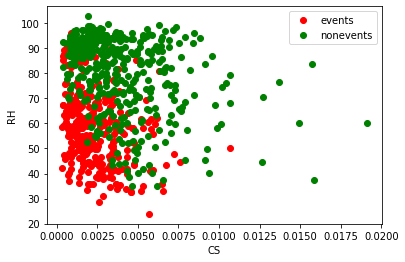

In [0]:
plt.plot(events["CS"],events["RH"],"ro",label="events")
plt.plot(nonevents["CS"],nonevents["RH"],"go",label="nonevents")
plt.xlabel("CS")
plt.ylabel("RH")
plt.legend()
plt.show()

In [0]:
npf.shape

(724, 3)

In [0]:
c_hat = ols_fit.predict(npf[["CS","RH"]])

(array([ 1.,  1.,  1.,  2.,  8.,  9., 18., 26., 63., 68., 83., 70., 56.,
        49., 57., 69., 61., 51., 18., 13.]),
 array([-0.75054619, -0.65363205, -0.5567179 , -0.45980376, -0.36288962,
        -0.26597547, -0.16906133, -0.07214719,  0.02476696,  0.1216811 ,
         0.21859525,  0.31550939,  0.41242353,  0.50933768,  0.60625182,
         0.70316596,  0.80008011,  0.89699425,  0.99390839,  1.09082254,
         1.18773668]),
 <a list of 20 Patch objects>)

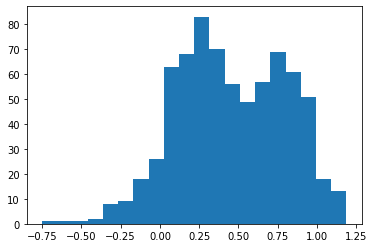

In [0]:
plt.hist(c_hat,bins=20)

We have quite a lot of numbers outside [0,1] which is not nice since probabilities should not have those


In [0]:
np.median(c_hat)

0.43877987656748063

In [0]:
hat_nonevent_ind = (c_hat <= np.median(c_hat))
hat_event_ind = (c_hat > np.median(c_hat))

In [0]:
hat_nonevents = npf[hat_nonevent_ind]
hat_events = npf[hat_event_ind]

In [0]:
ols_fit.params

Intercept     1.845181
RH           -0.016180
CS          -78.829949
dtype: float64

In [0]:
interc = ols_fit.params[0]
rh = ols_fit.params[1]
cs = ols_fit.params[2]

In [0]:
def ols_line(r):
    #return interc + rh*r + cs*c
    return np.median(c_hat)/cs-interc/cs-rh/cs*r

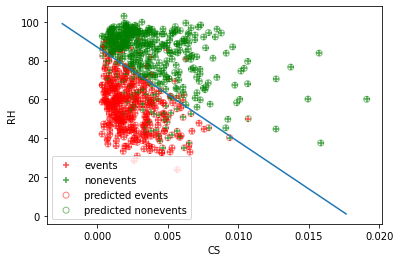

In [0]:
#plt.scatter(events["CS"],events["RH"],label="events",alpha=0.9,facecolors='none',edgecolors='r')
#plt.scatter(nonevents["CS"],nonevents["RH"],label="nonevents",alpha=0.9,facecolors='none',edgecolors='g')
#plt.plot(hat_events["CS"],hat_events["RH"],"r+",label="predicted events")
#plt.plot(hat_nonevents["CS"],hat_nonevents["RH"],"g+",label="predicted nonevents")

plt.scatter(events["CS"],events["RH"],label="events",marker='+',c='r',alpha=0.7)#facecolors='none',edgecolors='r')
plt.scatter(nonevents["CS"],nonevents["RH"],label="nonevents",marker='+',c='g',alpha=0.7)#facecolors='none',edgecolors='g')
plt.scatter(hat_events["CS"],hat_events["RH"],label="predicted events",facecolors='none',edgecolors='r',alpha=0.5)
plt.scatter(hat_nonevents["CS"],hat_nonevents["RH"],label="predicted nonevents",facecolors='none',edgecolors='g',alpha=0.5)


plt.plot(ols_line(range(1,100)),range(1,100))
plt.xlabel("CS")
plt.ylabel("RH")
plt.legend()
plt.show()

* apply multiple logistic reggresion to conditional probability

$$
P(Y=1|\mathrm{RH},\mathrm{CS})=\frac{e^{\beta_{0}+\beta_{1} \mathrm{RH}+\beta_{3} \mathrm{CS}}}{1+e^{\beta_{0}+\beta_{1} \mathrm{RH}+\beta_{3} \mathrm{CS}}}
$$

* plot the fitted probability of event conditioned on the factors. What can you conclude?

In [0]:
model = smf.logit(formula="c ~ RH + CS", data=npf)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.371188
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      c   No. Observations:                  724
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 May 2020   Pseudo R-squ.:                  0.4614
Time:                        11:48:46   Log-Likelihood:                -268.74
converged:                       True   LL-Null:                       -499.01
Covariance Type:            nonrobust   LLR p-value:                9.927e-101
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8985      0.714     13.866      0.000       8.499      11.298
RH            -0.1117      0.

In [0]:
c_hat = fit.predict(npf[["CS","RH"]])

(array([113.,  75.,  39.,  40.,  33.,  29.,  24.,  18.,  17.,  16.,  12.,
         15.,  19.,  21.,  19.,  21.,  30.,  35.,  64.,  84.]),
 array([7.88126528e-06, 4.97286843e-02, 9.94494874e-02, 1.49170290e-01,
        1.98891094e-01, 2.48611897e-01, 2.98332700e-01, 3.48053503e-01,
        3.97774306e-01, 4.47495109e-01, 4.97215912e-01, 5.46936715e-01,
        5.96657518e-01, 6.46378321e-01, 6.96099124e-01, 7.45819927e-01,
        7.95540730e-01, 8.45261534e-01, 8.94982337e-01, 9.44703140e-01,
        9.94423943e-01]),
 <a list of 20 Patch objects>)

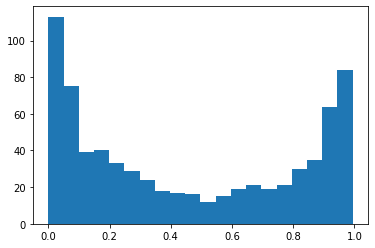

In [0]:
plt.hist(c_hat,bins=20)

The numbers are inside [0,1] which is nice :)


In [0]:
np.median(c_hat)

0.37831567975656877

In [0]:
hat_nonevent_ind = (c_hat <= np.median(c_hat))
hat_event_ind = (c_hat > np.median(c_hat))

In [0]:
hat_nonevents = npf[hat_nonevent_ind]
hat_events = npf[hat_event_ind]

In [0]:
fit.params

Intercept      9.898547
RH            -0.111673
CS          -781.505175
dtype: float64

In [0]:
interc = fit.params[0]
rh = fit.params[1]
cs = fit.params[2]

In [0]:
def logit_line(r):
    #return interc + rh*r + cs*c
    return np.log(np.median(c_hat)/(1- np.median(c_hat)))/cs-interc/cs-rh/cs*r
    #return np.log(np.exp(np.median(c_hat))/(1- np.exp(np.median(c_hat))))/cs-interc/cs-rh/cs*r
    #return np.log(np.median(c_hat))/cs-interc/cs-rh/cs*r

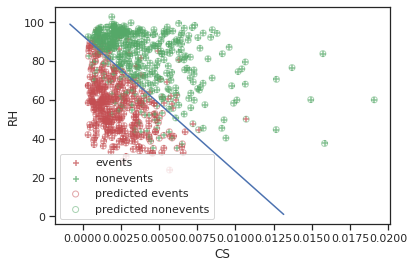

In [0]:
plt.scatter(events["CS"],events["RH"],label="events",marker='+',c='r',alpha=0.7)#facecolors='none',edgecolors='r')
plt.scatter(nonevents["CS"],nonevents["RH"],label="nonevents",marker='+',c='g',alpha=0.7)#facecolors='none',edgecolors='g')
plt.scatter(hat_events["CS"],hat_events["RH"],label="predicted events",facecolors='none',edgecolors='r',alpha=0.5)
plt.scatter(hat_nonevents["CS"],hat_nonevents["RH"],label="predicted nonevents",facecolors='none',edgecolors='g',alpha=0.5)
plt.plot(logit_line(range(1,100)),range(1,100))
plt.xlabel("CS")
plt.ylabel("RH")
plt.legend()
plt.show()

Logistic regression is better for classification  
Division shows more discrete in the histrogram


# Problem 2

Download the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) and choose only the species "versicolor" and "virginica", see the code below. You task is to build a Naive Bayes (NB) classifier that classifies the flower species - which are the class variable - based on the morphological measurements of the flowers, i.e., the four covariates.

## Tasks

* Split the dataset in random into training and validation sets. Use the training set to find your model.





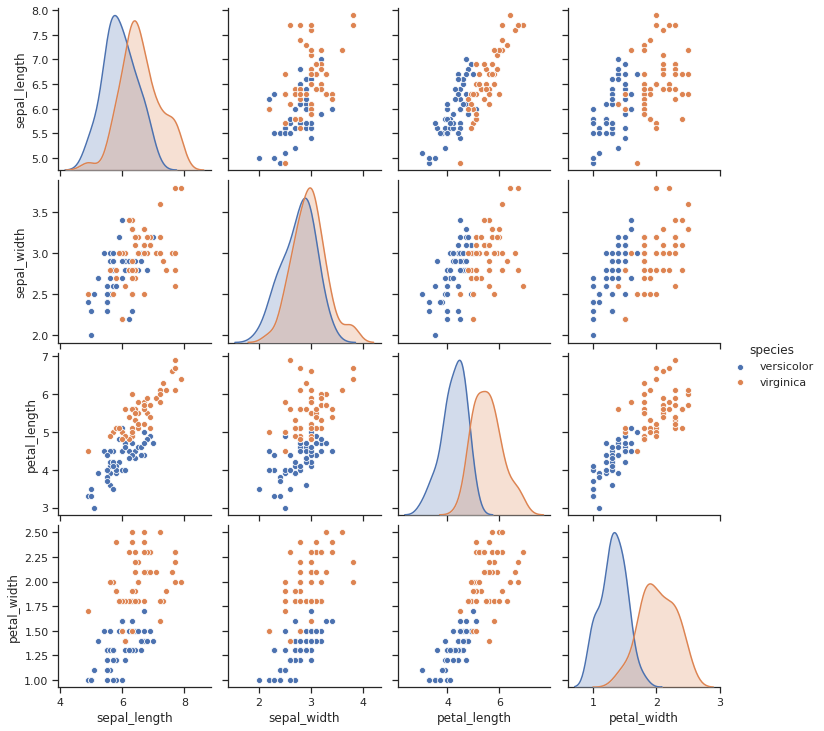

In [0]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris = iris.loc[iris["species"]!="setosa",:] # drop setosa
g = sns.pairplot(iris,hue="species")

In [0]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [0]:
X = iris.iloc[:,:4]
Y = iris.species

In [0]:
Y
Y = (Y.values != "versicolor")
Y = Y.astype(int)

# Versicolor = 0
# Virginica = 1

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

In [0]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((75, 4), (25, 4), (75,), (25,))

In [0]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.82      0.90        11

    accuracy                           0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25



In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[14  0]
 [ 2  9]]


* Compute means and variances of each of the attributes in the training set for both classes separately.


In [0]:
versicolor_ind = Y_train == 0
virginica_ind = Y_train == 1

versicolor = X_train[versicolor_ind]
virginica = X_train[virginica_ind]

In [0]:
meansicolor = versicolor.mean()
meansinica = virginica.mean()

In [76]:
meansicolor

sepal_length    5.927778
sepal_width     2.847222
petal_length    4.250000
petal_width     1.341667
dtype: float64

In [0]:
varsicolor = versicolor.var()
varsinica = virginica.var()

In [77]:
varsicolor

sepal_length    0.257492
sepal_width     0.076278
petal_length    0.220857
petal_width     0.037929
dtype: float64

* After you know the means and variances, you can find the class-specific expressions for $p(x\mid y)$. Remember that according to NB assumption the dimensions are independent, and hence, you can represent the class-specific $p(x\mid y)$ likelihoods as products of 4 1-dimensional normal distributions (which you can write down if you know the means and variances you computed above).


In [0]:
np.normal()

* Then use the Bayes rule to find a the class probabilities for the flowers in the dataset. Report the classification accuracy both on training and validation set.


# Problem 3

Read Section 4.4 of James et al.

Consider classification problem where the observations can belong to $K$ classes, where $\pi_k$ represents *a prior* probability that randomly chosen observation comes from class $k$, $f_{k}(x) \equiv \operatorname{Pr}(X=x | Y=k)$ stands from the *probability density function* of $X$ given that the observation belongs to class $k$. Assume that the conditional probability has a Gaussian shape for each of the classes:

$$f_{k}(x)=\frac{1}{\sqrt{2 \pi} \sigma_{k}} \exp \left(-\frac{1}{2 \sigma_{k}^{2}}\left(x-\mu_{k}\right)^{2}\right)$$

The by the Bayes theorem, a *posterior* probability that the observation $Y$ belong to class $k$ is

\begin{equation}
p_{k}(x)=\frac{\pi_{k} \frac{1}{\sqrt{2 \pi} \sigma_{k}} \exp \left(-\frac{1}{2 \sigma_{k}^{2}}\left(x-\mu_{k}\right)^{2}\right)}{\sum_{l=1}^{K} \pi_{l} \frac{1}{\sqrt{2 \pi} \sigma_{k}} \exp \left(-\frac{1}{2 \sigma_{k}^{2}}\left(x-\mu_{l}\right)^{2}\right)}
\label{eq: bayes_prob}
\end{equation}

The Bayes classifier will assign an observation $X=x$ to the class for which $p_{k}(x)$ is the largest. Assume that all the classes have the same variance term $\sigma^2$. Show that the classification problem is equivalent to

$$\mathrm{argmax}_k \left(x\cdot\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log(\pi_k)\right)$$
